<a href="https://colab.research.google.com/github/kannan-ux/sakthikannan--s/blob/main/git_gradientboosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/content/new_insurance_data.csv")

In [3]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [4]:
df.shape

(1338, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [6]:
df.isna().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [7]:
df.head(2)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066


In [8]:
for i in df.select_dtypes(include='float64').columns:
  if(df[i].skew()>0.5):
    print(i,"skweed")
    df[i]=df[i].fillna(df[i].median())
  else:
    print(i,"normal")
    df[i]=df[i].fillna(df[i].mode())


age normal
bmi normal
children skweed
Claim_Amount normal
past_consultations normal
num_of_steps normal
Hospital_expenditure skweed
NUmber_of_past_hospitalizations normal
Anual_Salary skweed
charges skweed


In [9]:
df.isna().sum()

,0
age,9
sex,0
bmi,3
children,0
smoker,0
Claim_Amount,0
past_consultations,6
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,2


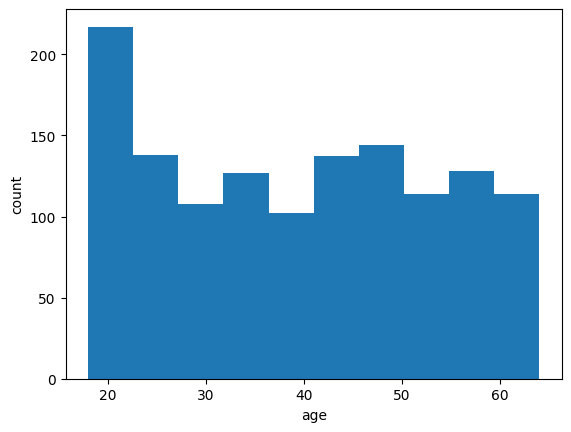

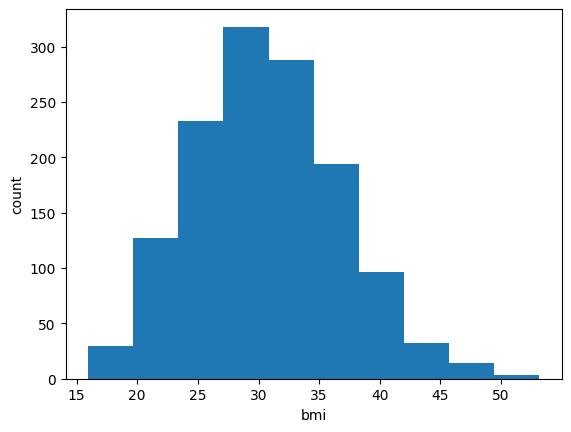

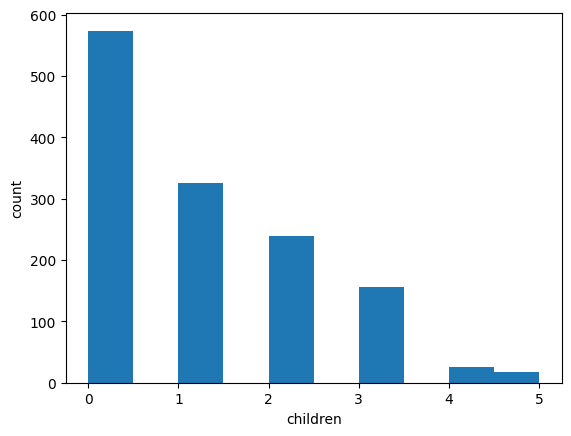

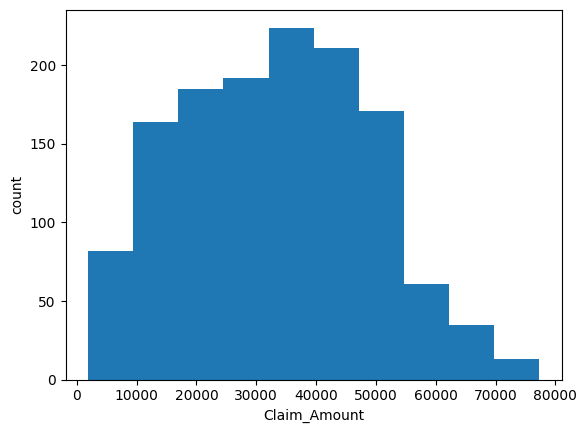

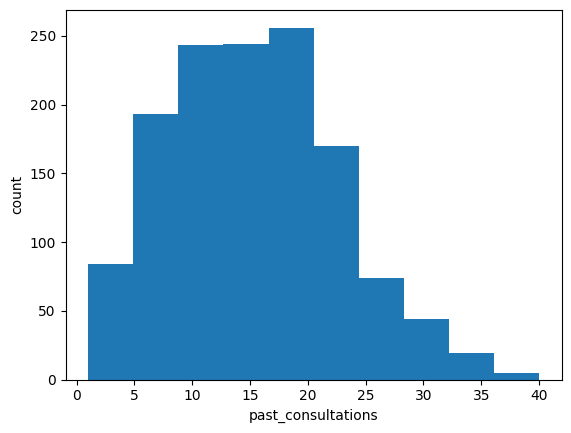

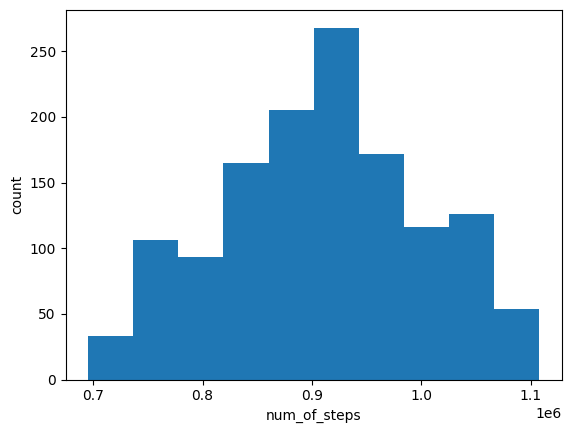

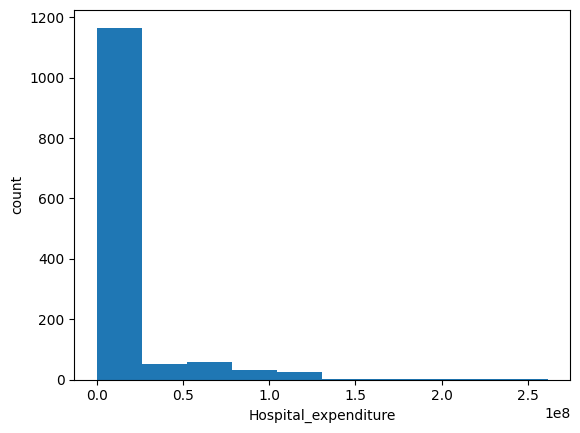

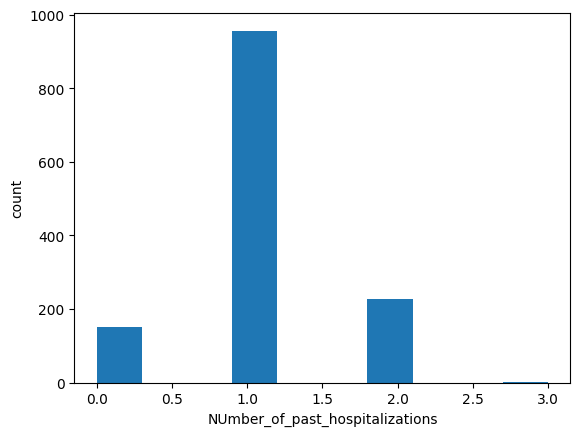

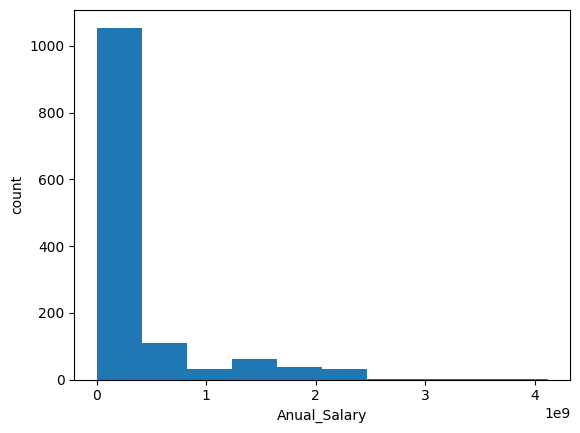

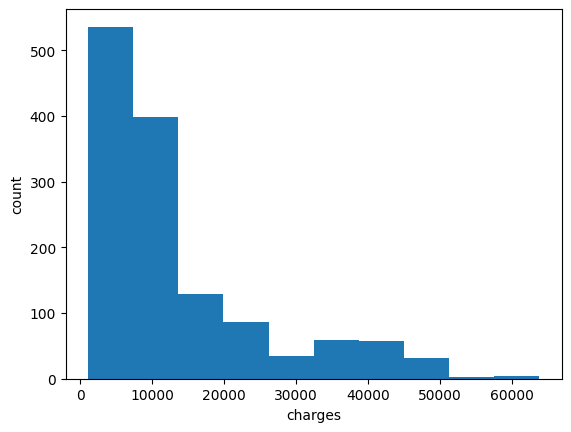

In [10]:
for i  in df.select_dtypes(include='float64').columns:
  plt.hist(df[i])
  plt.xlabel(i)
  plt.ylabel("count")
  plt.show()

In [11]:
import seaborn as sns

<Axes: >

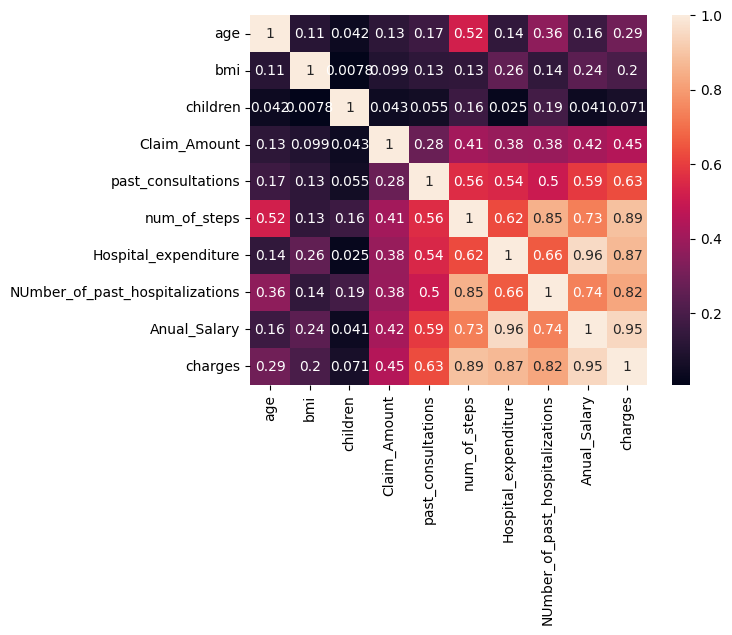

In [12]:
df_num=df.select_dtypes(include='float64')
sns.heatmap(df_num.corr(),annot=True)

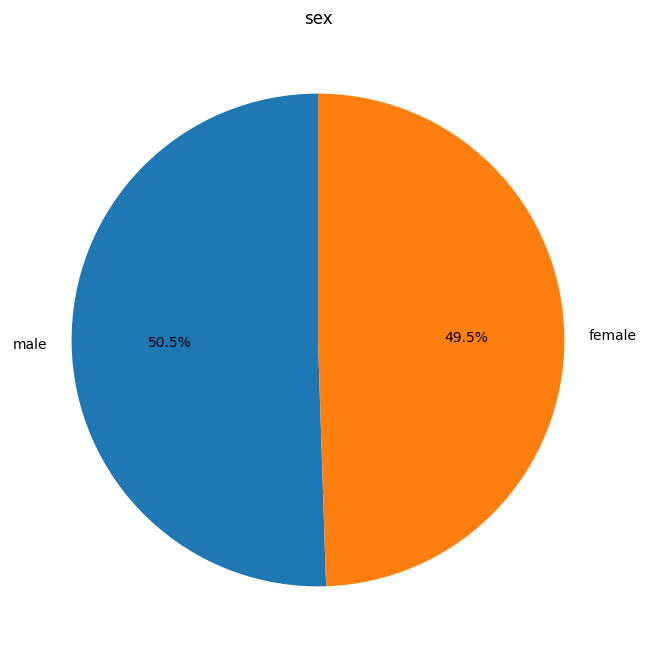

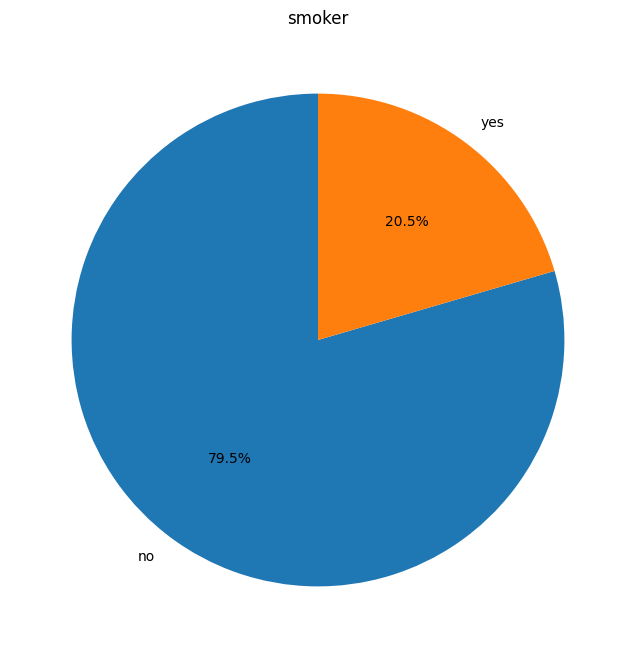

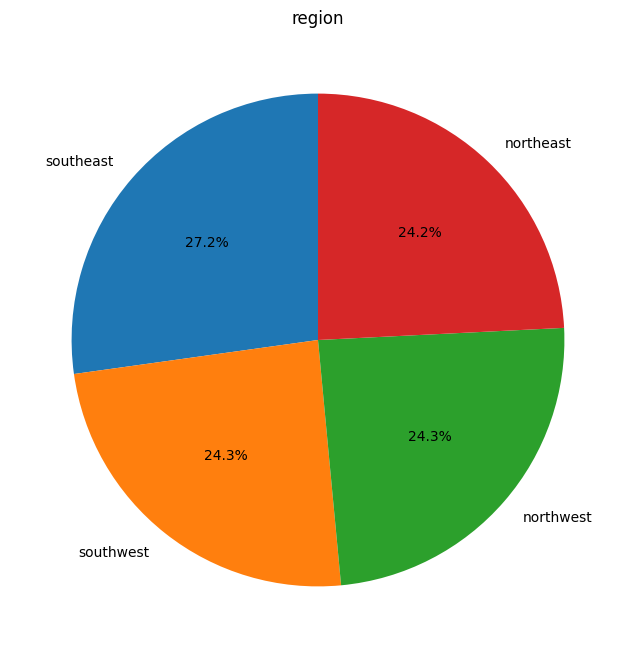

In [13]:
for i in df.select_dtypes(include='object'):
  plt.figure(figsize=(8,8))
  cnt=df[i].value_counts()
  plt.title(i)
  plt.pie(cnt,labels=cnt.index, autopct='%1.1f%%',startangle=90)

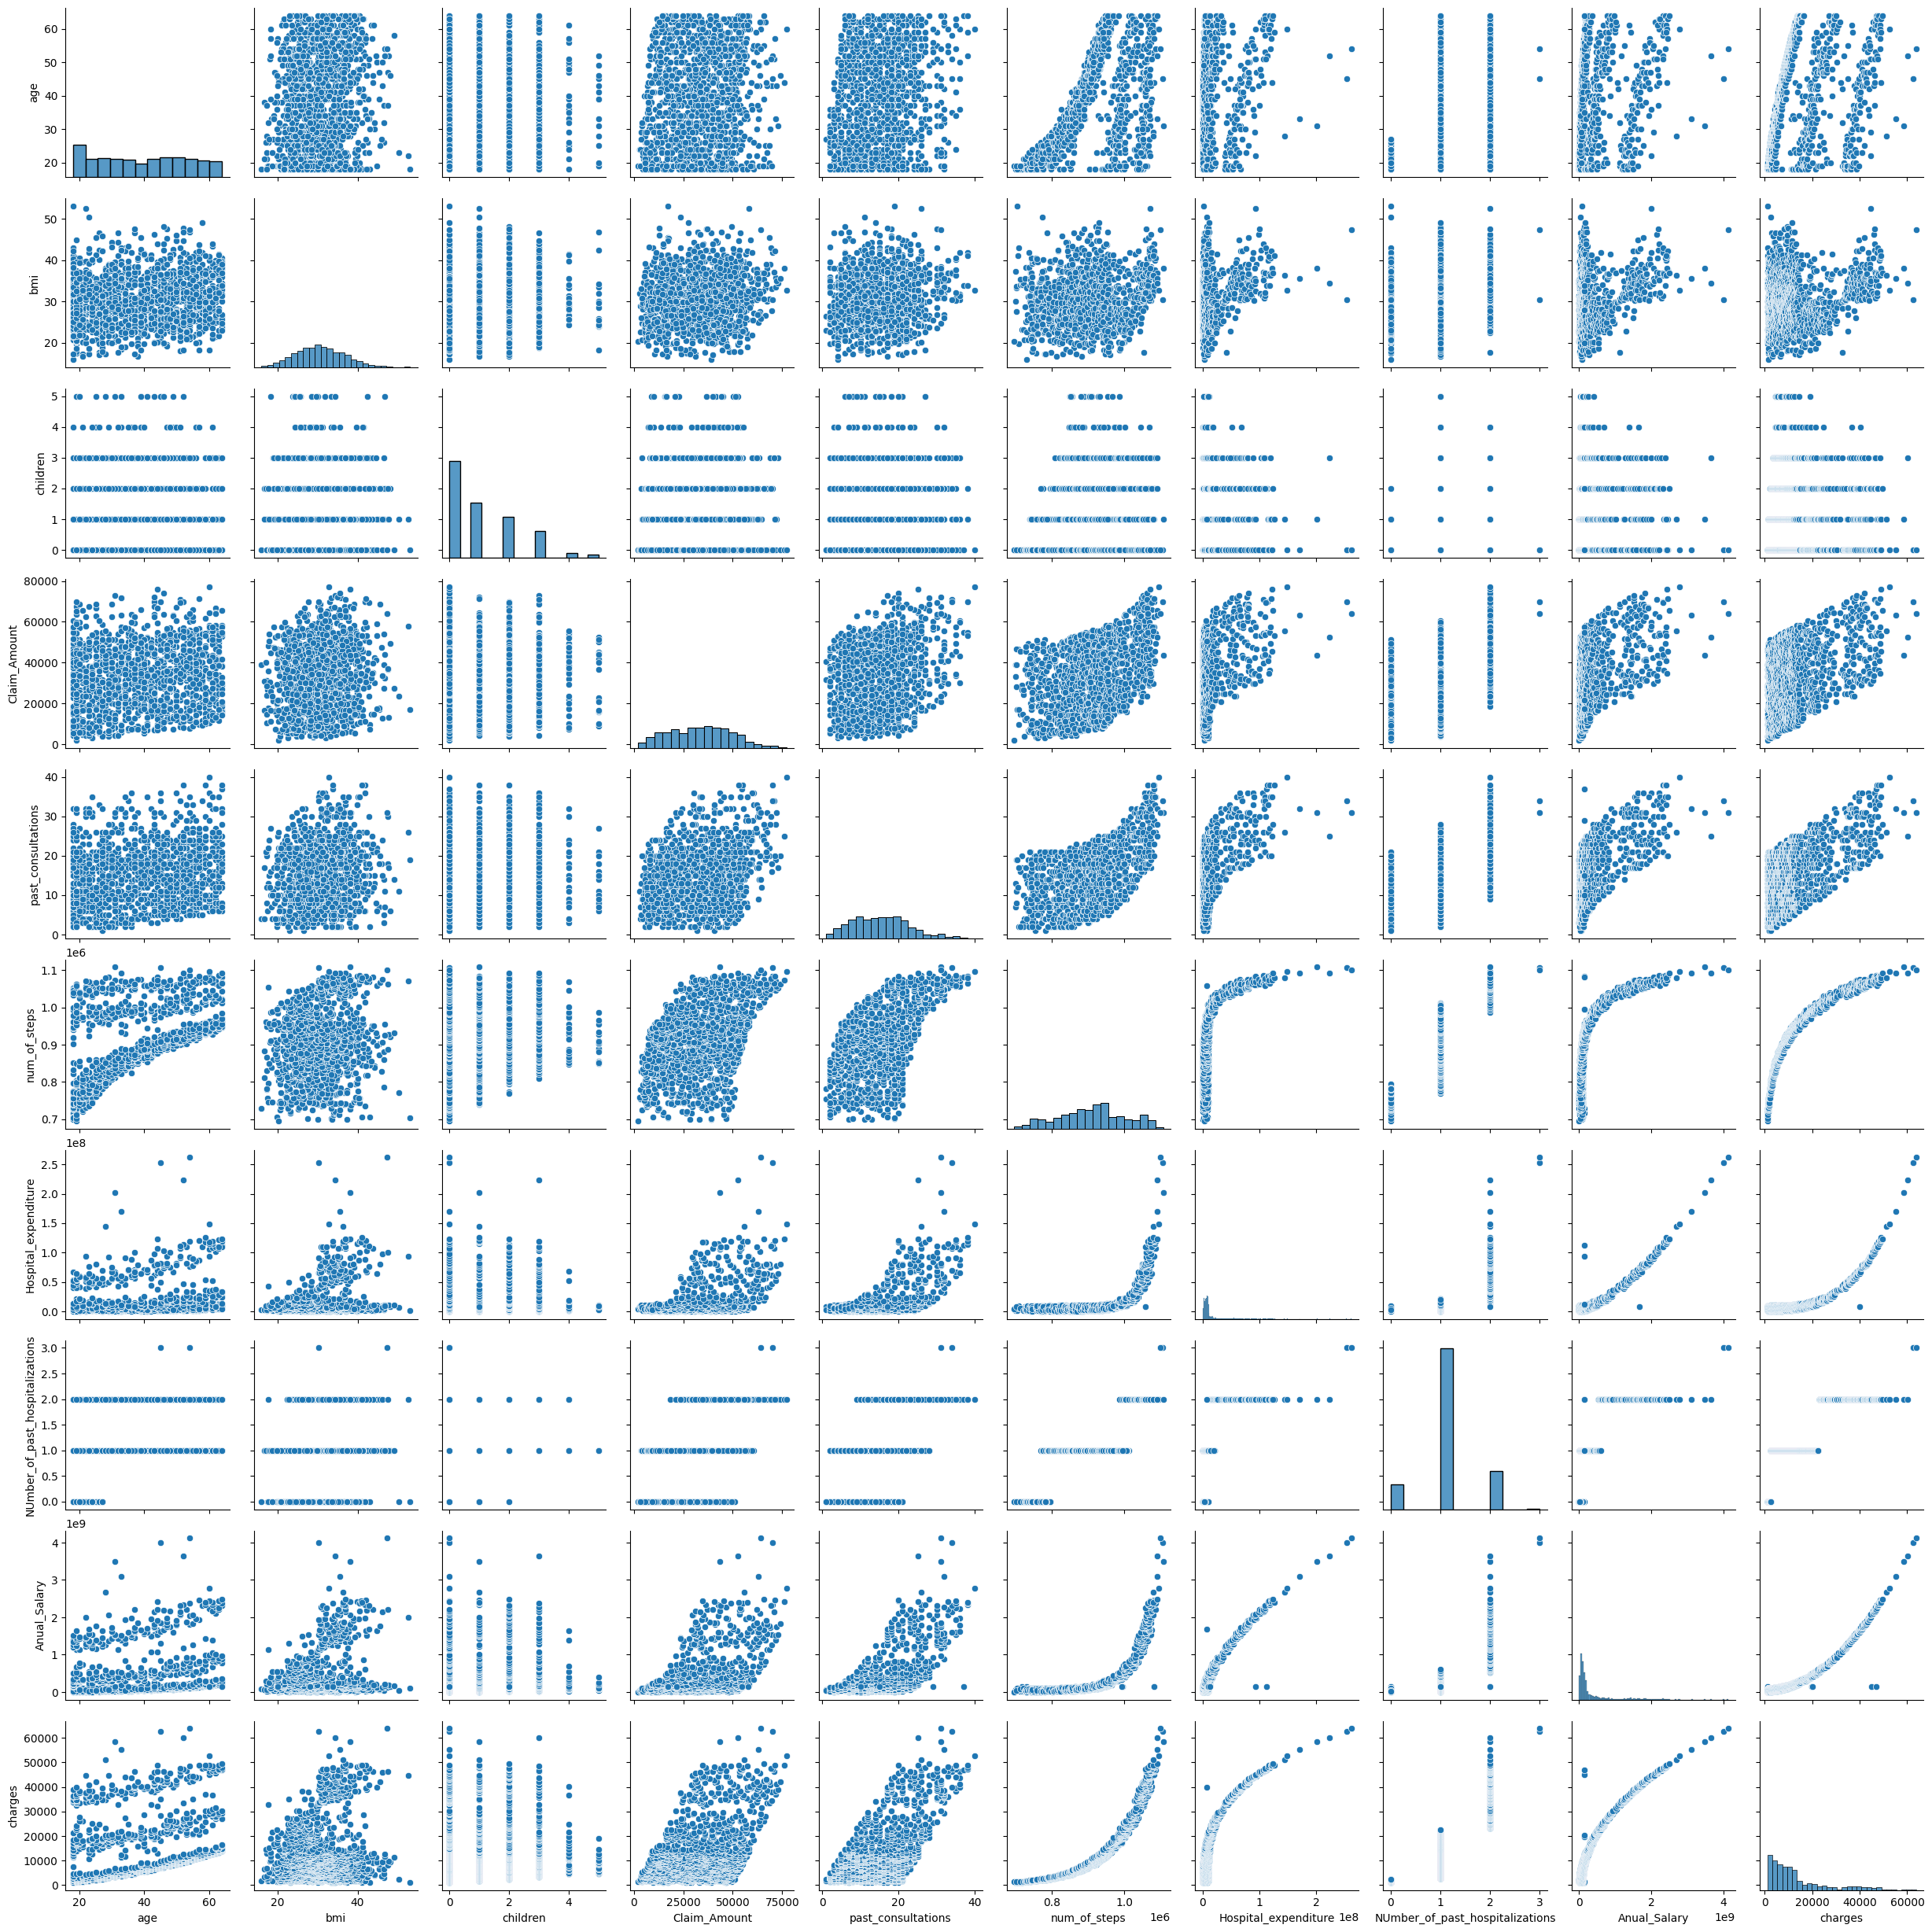

In [14]:
sns.pairplot(df)





In [15]:
y=df.iloc[:,-1]

In [16]:
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1333,55135.40209
1334,58571.07448
1335,60021.39897
1336,62592.87309


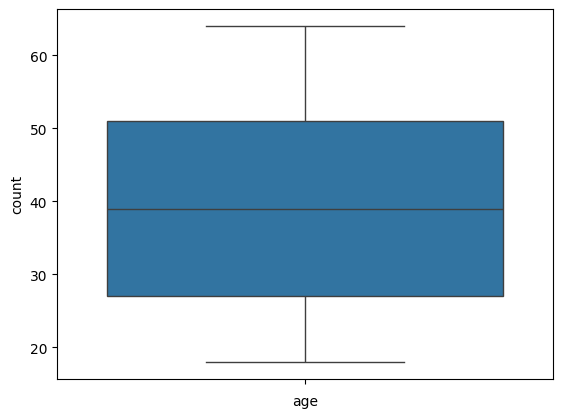

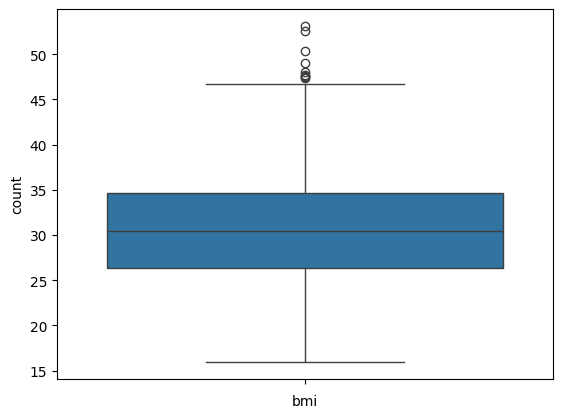

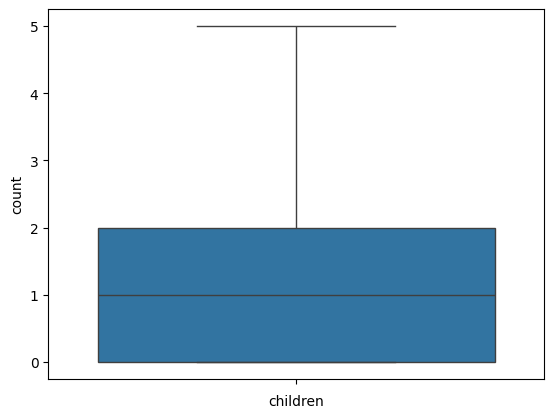

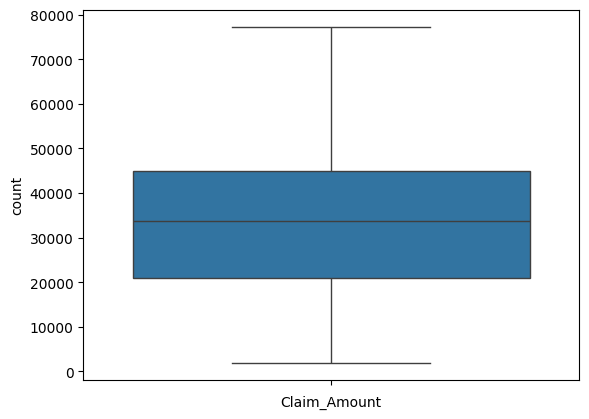

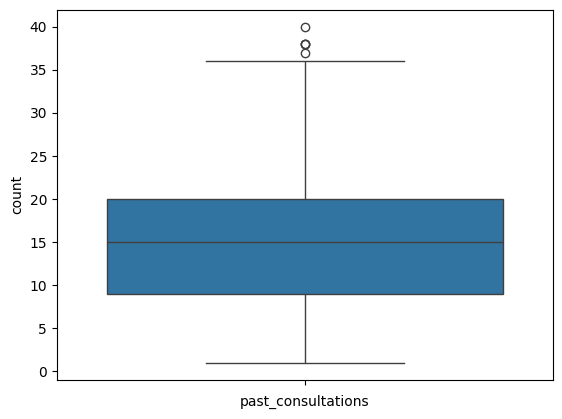

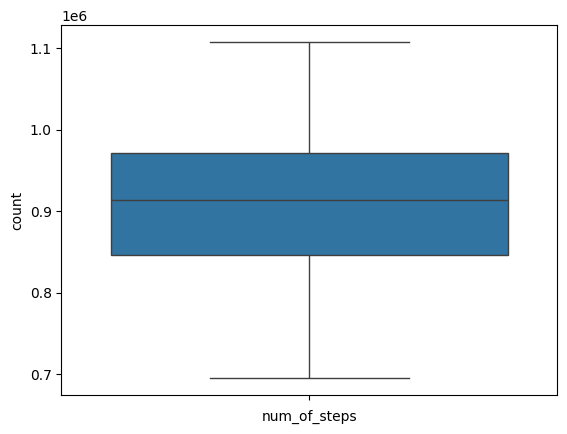

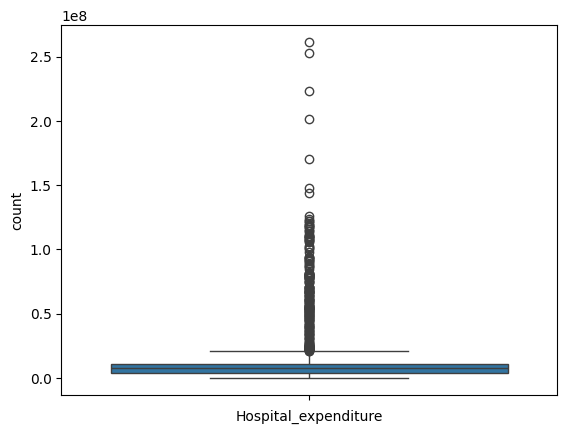

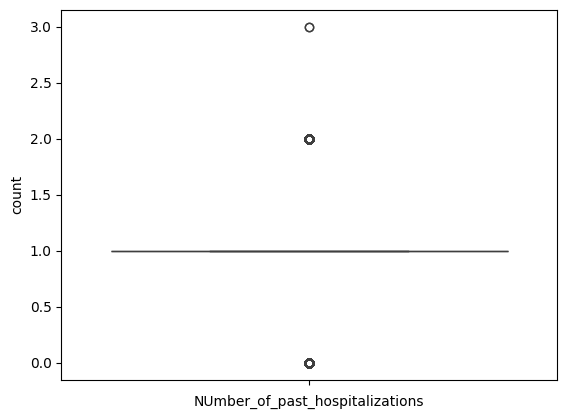

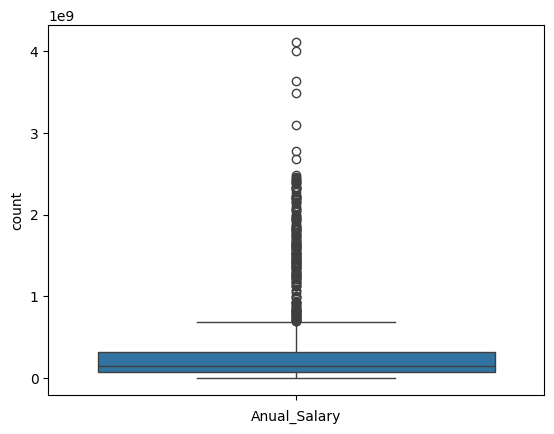

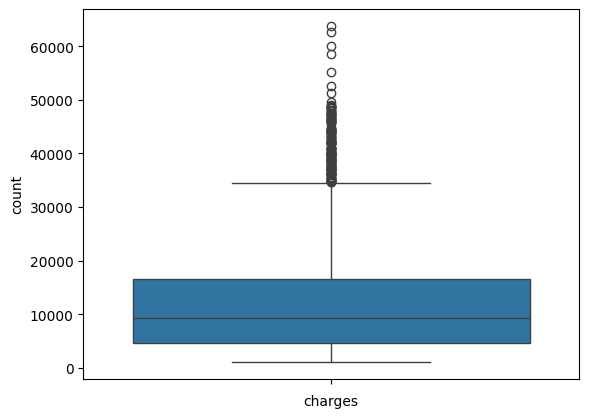

In [17]:
for i in df.select_dtypes(include='float64').columns:
  sns.boxplot(df[i])
  plt.xlabel(i)
  plt.ylabel("count")
  plt.show()

Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'charges'],
      dtype='object')


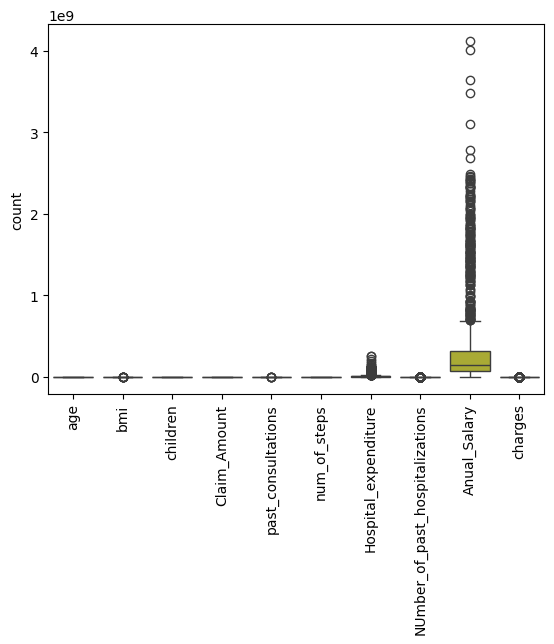

In [18]:
ddd=df.select_dtypes(include='float64').columns
print(ddd)
sns.boxplot(df[ddd])
plt.xticks(rotation='vertical')
plt.ylabel("count")
plt.show()

In [19]:
outlier_list=['bmi','past_consultations','Hospital_expenditure','Anual_Salary']

In [20]:
for i in outlier_list:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  df=df[(df[i]>Q1-1.5*IQR)&(df[i]<Q3+1.5*IQR)]

In [21]:
df.isna().sum()

,0
age,9
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,1


In [22]:
df.duplicated().sum()

0

In [24]:
df=df.drop(['NUmber_of_past_hospitalizations'],axis=1)

In [25]:
df=df.drop(['age'],axis=1)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var=[]
for i in df.columns:
  if((df[i].dtypes!="object")&(i!="charges")):
   var.append(i)
X=df[var]
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i)for i in  range (len(X.columns))]

In [46]:
vif_data

,feature,VIF
0,bmi,25.469771
1,children,1.830901
2,Claim_Amount,5.670448
3,past_consultations,6.215387
4,num_of_steps,45.342651
5,Hospital_expenditure,5.301554
6,Anual_Salary,5.029219


In [47]:
df=df.drop(['bmi'],axis=1)

In [54]:
var=[]
for i in df.columns:
  if((df[i].dtype!="object")&(i!="charges")):
    var.append(i)
X=df[var]
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i)for i in range (len(X.columns))]

In [55]:
vif_data

,feature,VIF
0,children,1.824545
1,Claim_Amount,5.670327
2,past_consultations,6.212034
3,num_of_steps,16.049833
4,Hospital_expenditure,5.299482
5,Anual_Salary,4.669503


In [56]:
df=df.drop(['num_of_steps'],axis=1)

In [58]:
var=[]
for i in df.columns:
  if((df[i].dtype!="object")&(i!="charges")):
    var.append(i)
X=df[var]
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i)for i in range (len(X.columns))]
vif_data

,feature,VIF
0,children,1.710539
1,Claim_Amount,4.158138
2,past_consultations,4.664965
3,Hospital_expenditure,4.400583
4,Anual_Salary,4.425467


([0, 1, 2, 3, 4],
 [Text(0, 0, 'children'),
  Text(1, 0, 'Claim_Amount'),
  Text(2, 0, 'past_consultations'),
  Text(3, 0, 'Hospital_expenditure'),
  Text(4, 0, 'Anual_Salary')])

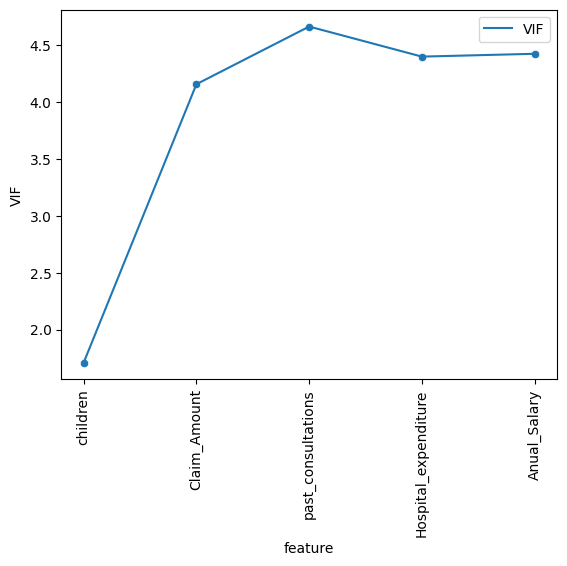

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=vif_data , x='feature',y='VIF')
sns.lineplot(data=vif_data)
plt.xticks(rotation=90)

In [68]:
from sklearn.model_selection import train_test_split


In [71]:
x

,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,Anual_Salary
0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,5.578497e+07
1,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,1.370089e+07
2,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,7.352311e+07
3,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,7.581968e+07
4,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...,...,...
1046,27.940,1.0,51168.25474,23.0,993751.0,1.665982e+07,3.712188e+08
1048,25.900,3.0,46619.40230,27.0,989387.0,1.361938e+07,3.812895e+08
1050,29.810,0.0,24382.58056,21.0,973924.0,1.028991e+07,3.745310e+08
1062,20.045,2.0,21596.43846,10.0,994419.0,1.083030e+07,1.419361e+08


In [78]:
X1=x.drop(['bmi'],axis=1)

In [80]:
X1

,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,Anual_Salary
0,0.0,29087.54313,17.0,715428.0,4.720921e+06,5.578497e+07
1,0.0,39053.67437,7.0,699157.0,4.329832e+06,1.370089e+07
2,0.0,39023.62759,19.0,702341.0,6.884861e+06,7.352311e+07
3,0.0,28185.39332,11.0,700250.0,4.274774e+06,7.581968e+07
4,0.0,14697.85941,16.0,711584.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...,...
1046,1.0,51168.25474,23.0,993751.0,1.665982e+07,3.712188e+08
1048,3.0,46619.40230,27.0,989387.0,1.361938e+07,3.812895e+08
1050,0.0,24382.58056,21.0,973924.0,1.028991e+07,3.745310e+08
1062,2.0,21596.43846,10.0,994419.0,1.083030e+07,1.419361e+08


In [81]:
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1333,55135.40209
1334,58571.07448
1335,60021.39897
1336,62592.87309


In [87]:
Y=df.iloc[:,-1]

In [88]:
Y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1046,19107.77960
1048,19199.94400
1050,19350.36890
1062,19798.05455


In [89]:
X1_train,X1_test,Y_train,Y_test=train_test_split(X1,Y,test_size=0.2)

In [90]:
X1_train

,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,Anual_Salary
526,2.0,16330.44940,22.0,885429.0,7.621215e+06,1.165326e+08
160,1.0,27356.10242,4.0,798681.0,2.158890e+06,9.739940e+07
661,1.0,48421.09614,20.0,915796.0,4.189292e+06,1.806202e+08
966,0.0,52654.94813,13.0,956275.0,1.013147e+07,3.000398e+08
640,1.0,46712.69090,17.0,917642.0,9.715569e+06,1.572821e+08
...,...,...,...,...,...,...
91,0.0,32268.23099,2.0,743787.0,4.092690e+06,6.936478e+07
807,0.0,38473.01782,21.0,919690.0,2.087158e+06,1.449292e+08
373,1.0,47511.14927,15.0,840737.0,6.969061e+06,4.423883e+07
451,3.0,28419.56975,16.0,864693.0,3.487531e+06,1.381901e+08


In [91]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [92]:
lr.fit(X1_train,Y_train)

LinearRegression()

In [94]:
 predictions=lr.predict(X1_test)

In [95]:
from sklearn.metrics import *
r2=r2_score(Y_test,predictions)

In [96]:
r2

0.9535865236248389

In [97]:
X1_test

,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,Anual_Salary
845,3.0,52155.95883,11.0,942142.0,7.683186e+06,1.969077e+08
470,1.0,37651.45400,21.0,892470.0,1.001268e+07,6.333859e+07
871,3.0,53378.63359,6.0,951156.0,1.102662e+07,1.587670e+08
315,1.0,37545.49519,3.0,841917.0,4.551620e+06,5.498224e+07
860,0.0,27369.02461,22.0,943007.0,3.634140e+06,1.877743e+08
...,...,...,...,...,...,...
484,3.0,49292.19992,7.0,868270.0,3.732688e+05,8.403831e+07
907,0.0,14825.98631,12.0,949860.0,1.066482e+07,1.920431e+08
542,1.0,40512.74927,15.0,886145.0,1.403044e+06,1.368308e+08
384,2.0,29946.32144,15.0,847888.0,4.697700e+06,5.466699e+07


In [99]:
a=lr.predict([[3.0,52155.95883,11.0	,942142.0	,7.683186e+06	,1.969077e+08]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [100]:
a

array([11844.66623567])

In [101]:
print(mean_squared_error(Y_test,predictions))

844435.7161225752


<Axes: xlabel='charges'>

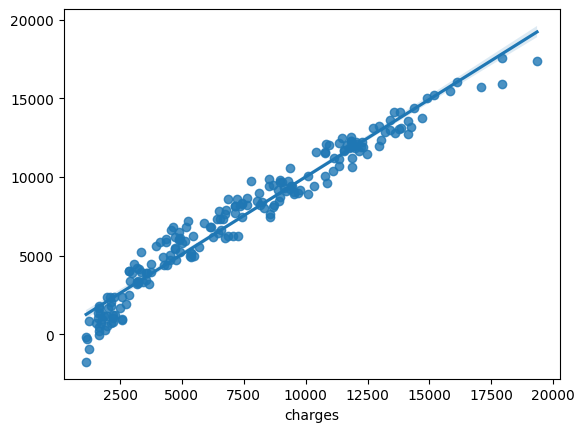

In [103]:
sns.regplot(x=Y_test,y=predictions)

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
gif=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=50)

In [107]:
gif.fit(X1_train,Y_train)

GradientBoostingRegressor(random_state=50)

In [108]:
y_train_pred=gif.predict(X1_train)
Y_test_pred=gif.predict(X1_test)

In [114]:
r21=r2_score(Y_train,y_train_pred)
r22=r2_score(Y_test,Y_test_pred)

In [113]:
r21

0.9804096470578959

In [115]:
r22

0.9804096470578959

In [118]:
mse1=mean_squared_error(Y_train,y_train_pred)


In [119]:
mse2=mean_squared_error(Y_test,Y_test_pred)

In [120]:
mse2

356422.20768045675

<Axes: xlabel='charges'>

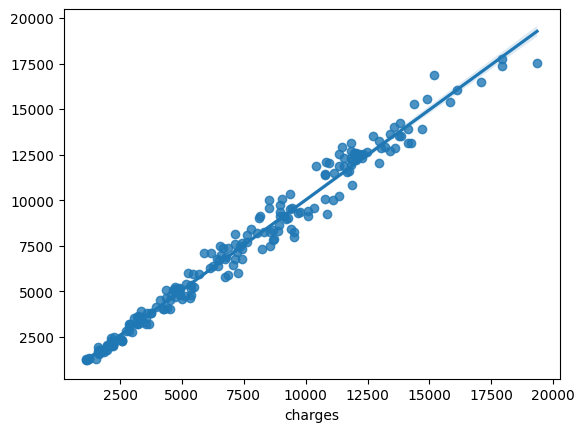

In [121]:
sns.regplot(x=Y_test,y=Y_test_pred)